In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from scipy.stats import randint

In [2]:
data = pd.read_csv("../mcats/data/norm_jamendo_data_2.csv")

In [3]:
data = data.drop("Unnamed: 0", axis =1)

In [4]:
data.head(3)

,tempo,beats_mean,beats_var,zero_crossings_mean,zero_crossings_var,spectral_centroids_mean,spectral_centroids_var,spectral_rolloff_mean,spectral_rolloff_var,mfcc_1_mean,...,mfcc_36_var,mfcc_37_mean,mfcc_37_var,mfcc_38_mean,mfcc_38_var,mfcc_39_mean,mfcc_39_var,mfcc_40_mean,mfcc_40_var,genre
0,1.003966,0.122272,0.187999,-1.410052,-1.549644,-0.791929,1.923325,-0.571025,3.309409,-1.343421,...,-0.748305,0.230004,-0.776951,-1.332095,-0.741770,-0.269807,-0.519712,-0.159013,-0.597178,0
1,-1.079908,0.107931,0.111471,0.314154,0.379111,0.043147,3.717204,-0.097906,3.564664,-1.224810,...,0.493576,-1.897921,-0.740129,0.314150,-0.219132,0.659573,-0.649077,-0.486640,-0.358558,0
2,1.318718,0.616986,0.058265,-0.577333,-0.581237,-0.018832,-0.128383,0.261829,0.079143,0.902551,...,-0.443534,-1.118393,-0.173191,-0.036943,-0.086174,-0.061328,-0.088370,1.119735,0.139470,0


In [5]:
X = data.drop(columns = "genre")
y = data["genre"]

In [6]:
X.shape

(1197, 89)

In [7]:
model = LogisticRegression(max_iter=1000)
# random grid search mess around with penalties, C, and solver. If not good try different feature engineering.

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, 
                                                    random_state=42)


cv_results = cross_validate(model, X_train, y_train, cv=5)

accuracy = cv_results['test_score'].mean()
accuracy

0.5423102094240838

In [8]:
# model = LogisticRegression(max_iter=1000)

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.30, 
#                                                     random_state=42)


# cv_results = cross_validate(model, X_train, y_train, cv=5)

# accuracy = cv_results['test_score'].mean()
# accuracy

In [9]:
# model = LogisticRegression(max_iter=1000)

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.35, 
#                                                     random_state=42)


# cv_results = cross_validate(model, X_train, y_train, cv=5)

# accuracy = cv_results['test_score'].mean()
#accuracy

In [12]:
model.fit(X_train, y_train)
preds = model.predict(X_train)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.84      0.80      0.82       123
   classical       0.95      0.98      0.97       115
         pop       0.67      0.62      0.65       117
  electronic       0.71      0.77      0.74       113
       metal       0.76      0.80      0.78       121
        rock       0.73      0.68      0.70       120
     country       0.73      0.73      0.73       120
      reggae       0.83      0.82      0.82       128

    accuracy                           0.78       957
   macro avg       0.78      0.78      0.78       957
weighted avg       0.78      0.78      0.78       957



In [13]:
model.fit(X_train, y_train)
preds = model.predict(X_test)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.58      0.67      0.62        27
   classical       0.79      0.89      0.84        35
         pop       0.21      0.12      0.16        32
  electronic       0.50      0.43      0.46        37
       metal       0.69      0.71      0.70        28
        rock       0.53      0.53      0.53        30
     country       0.39      0.40      0.39        30
      reggae       0.41      0.57      0.48        21

    accuracy                           0.54       240
   macro avg       0.51      0.54      0.52       240
weighted avg       0.52      0.54      0.52       240



In [26]:
model = LogisticRegression(n_jobs =-1)  
model_parameters = { 'penalty':['l1', 'l2', 'elasticnet', None],
                    'C': randint(0,5),
                    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 
                   }
random_search= RandomizedSearchCV(model, model_parameters, n_iter=100, cv=5, random_state=1, verbose=2)

model =random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, penalty=None, solver=saga; total time=   1.1s
[CV] END .....................C=1, penalty=None, solver=saga; total time=   0.6s
[CV] END .....................C=1, penalty=None, solver=saga; total time=   0.6s
[CV] END .....................C=1, penalty=None, solver=saga; total time=   0.7s
[CV] END .....................C=1, penalty=None, solver=saga; total time=   0.6s
[CV] END ..................C=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=0, penalty=l1, so

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.3s
[CV] END ..........C=4, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .......................C=2, penalty=l1, solver=saga; total time=   0.4s
[CV] END .......................C=2, penalty=l1, solver=saga; total time=   0.4s
[CV] END .......................C=2, penalty=l1, solver=saga; total time=   0.4s
[CV] END .......................C=2, penalty=l1, solver=saga; total time=   0.4s
[CV] END .......................C=2, penalty=l1, solver=saga; total time=   0.4s
[CV] END ............C=2, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ............C=2, pe

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=2, penalty=l1, solver=liblinear; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=2, penalty=l1, solver=liblinear; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=2, penalty=l1, solver=liblinear; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=2, penalty=l1, solver=liblinear; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=2, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.3s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...................

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=4, penalty=l1, solver=liblinear; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=4, penalty=l1, solver=liblinear; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=4, penalty=l1, solver=liblinear; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=4, penalty=l1, solver=liblinear; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=4, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ..................C=3, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=3, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=3, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=3, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=3, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......................C=4, penalty=l1, solver=saga; total time=   0.4s
[CV] END .......................C=4, penalty=l1, solver=saga; total time=   0.4s
[CV] END .......................C=4, penalty=l1, solver=saga; total time=   0.4s
[CV] END .......................C=4, penalty=l1, solver=saga; total time=   0.4s
[CV] END .......................C=4, penalty=l1, solver=saga; total time=   0.4s
[CV] END ..................C=3, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..................C

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=2, penalty=None, solver=newton-cg; total time=   3.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=2, penalty=None, solver=newton-cg; total time=   5.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=2, penalty=None, solver=newton-cg; total time=   3.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=2, penalty=None, solver=newton-cg; total time=   3.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=2, penalty=None, solver=newton-cg; total time=   4.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.3s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ..........C=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, penalty=None, solver=newton-cholesky; total time=   0.1s
[CV] END ..........C=1, pena

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   0.3s
[CV] END ......................C=0, penalty=None, solver=sag; total time=   0.0s
[CV] END ......................C=0, penalty=None, solver=sag; total time=   0.0s
[CV] END ......................C=0, penalty=None, solver=sag; total time=   0.0s
[CV] END ......................C=0, penalty=None, solver=sag; total time=   0.0s
[CV] END ......................C=0, penalty=None, solver=sag; total time=   0.0s
[CV] END ........................C=3, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=3, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=3, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=3, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=3, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=4, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...................

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   0.2s
[CV] END ................C=1, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ................C=1, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ................C=1, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ................C=1, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ................C=1, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ................C=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ........................C=4, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/

[CV] END ..................C=3, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..................C=3, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..................C=3, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..................C=3, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..................C=4, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=4, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=4, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=4, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=4, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=2, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=2, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=2, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=2, 

[CV] END .......................C=3, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   0.3s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   3.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   5.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   3.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   3.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   4.0s
[CV] END ..........C=4, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ............C=0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ............C=0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ............C=0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ............C=0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ............C=0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ........................C=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty

[CV] END ..........C=3, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=3, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=2, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=2, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=2, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=2, penalty=None, solver=newton-cholesky; total time=   0.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.w

[CV] END ..........C=2, penalty=None, solver=newton-cholesky; total time=   0.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   3.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   5.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   3.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   3.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   4.0s
[CV] END ......................C=4, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=4, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=4, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=4, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=4, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=3, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=3, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=3, penalty=None, solver=lbfgs; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=3, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=3, penalty=None, solver=lbfgs; total time=   0.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......................C=3, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   0.3s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ..........C=2, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=2, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=2, pena

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   0.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   0.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   1.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=4, penalty=None, solver=lbfgs; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=4, penalty=None, solver=lbfgs; total time=   0.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=4, penalty=None, solver=lbfgs; total time=   0.4s
[CV] END ....................C=4, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ....................C=4, penalty=None, solver=lbfgs; total time=   0.1s
[CV] END ........................C=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=0, penalty=l1, solver=sag; total time=   0.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
295 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/root/.pyenv/versions/3.8.12/envs/mcats/lib

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
random_search.best_params_

{'C': 3, 'penalty': 'l2', 'solver': 'saga'}

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

In [30]:
model_1 = LogisticRegression(max_iter=1000, C= 3, penalty ='l2', solver ='saga')
model_1.fit(X_train, y_train)
preds = model_1.predict(X_train)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.86      0.83      0.85       123
   classical       0.95      0.99      0.97       115
         pop       0.69      0.65      0.67       117
  electronic       0.72      0.77      0.74       113
       metal       0.76      0.81      0.78       121
        rock       0.74      0.70      0.72       120
     country       0.74      0.72      0.73       120
      reggae       0.82      0.83      0.82       128

    accuracy                           0.79       957
   macro avg       0.79      0.79      0.79       957
weighted avg       0.79      0.79      0.79       957



/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
model_1 = LogisticRegression(max_iter=1000, C= 3, penalty ='l2', solver ='saga')
model_1.fit(X_train, y_train)
preds = model_1.predict(X_test)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.60      0.67      0.63        27
   classical       0.78      0.89      0.83        35
         pop       0.21      0.12      0.16        32
  electronic       0.50      0.41      0.45        37
       metal       0.69      0.71      0.70        28
        rock       0.48      0.47      0.47        30
     country       0.39      0.40      0.39        30
      reggae       0.41      0.62      0.49        21

    accuracy                           0.53       240
   macro avg       0.51      0.54      0.52       240
weighted avg       0.51      0.53      0.51       240



/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [37]:
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("pca", pca), ("logistic", logistic)])
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
    
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.567):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 60}


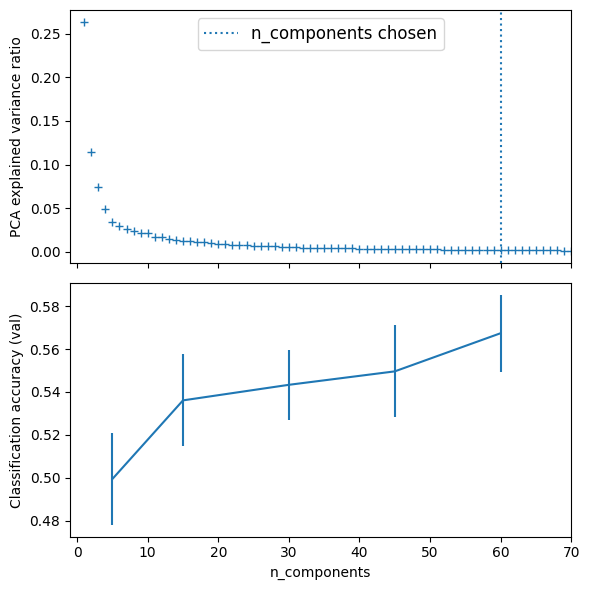

In [38]:
# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()